        Feature_1  Feature_2
record                      
0       11.492294 -10.236187
1        4.376245  -9.152790
2       -2.193675   3.212265
3       -2.976039   3.037043
4       -2.963703   2.336960


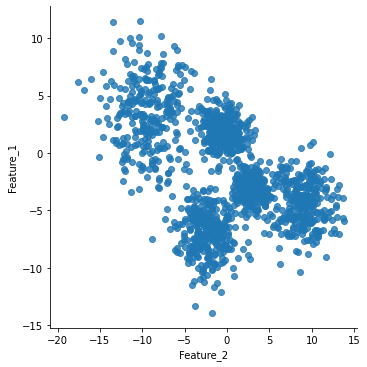

In [4]:
import pandas as pd
import seaborn as sns
from sklearn import datasets

def make_blobs():
    n_samples=1500
    blobs=datasets.make_blobs(n_samples,centers=5,cluster_std=[3.0,0.9,1.9,1.9,1.3],
                             random_state=51)
    
    df=pd.DataFrame(blobs[0],columns=['Feature_1','Feature_2'])
    df.index.name='record'
    return df

df=make_blobs()
print(df.head())

sns.lmplot(x='Feature_2',y='Feature_1',data=df,fit_reg=False)

In [9]:
df=make_blobs()
from sklearn.cluster import KMeans
clus=KMeans(n_clusters=5,tol=0.004,max_iter=300)
clus.fit(df)

df['K-means Cluster Labels']=clus.labels_
print(df['K-means Cluster Labels'][:5].tolist())
df.head()

[0, 0, 1, 1, 1]


,Feature_1,Feature_2,K-means Cluster Labels
record,,,
0,11.492294,-10.236187,0
1,4.376245,-9.152790,0
2,-2.193675,3.212265,1
3,-2.976039,3.037043,1
4,-2.963703,2.336960,1


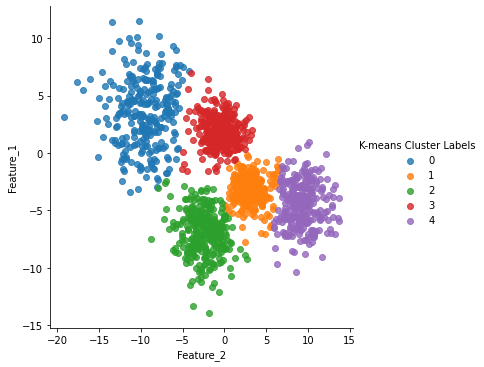

In [11]:
sns.lmplot(x="Feature_2",y="Feature_1",hue="K-means Cluster Labels",data=df,fit_reg=False)

In [12]:
df=make_blobs()

from sklearn import metrics

n_clusters=[2,3,4,5,6,7,8]

for k in n_clusters:
    kmeans=KMeans(n_clusters=k,random_state=42).fit(df)
    cluster_labels=kmeans.predict(df)
    S=metrics.silhouette_score(df,cluster_labels)
    print("n_clusters={:d},siluette{:1f}".format(k,S))

n_clusters=2,siluette0.442277
n_clusters=3,siluette0.442798
n_clusters=4,siluette0.513624
n_clusters=5,siluette0.547875
n_clusters=6,siluette0.524818
n_clusters=7,siluette0.521323
n_clusters=8,siluette0.488105


In [15]:
clus=KMeans(n_clusters=5,init='k-means++',tol=0.004,max_iter=300)

In [16]:
from sklearn.cluster import MiniBatchKMeans
clus=MiniBatchKMeans(n_clusters=5,batch_size=50,tol=0.004,max_iter=300)

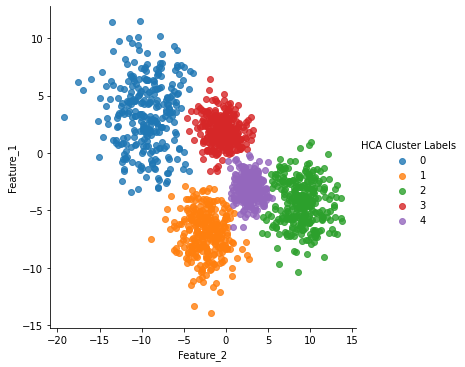

In [20]:
df=make_blobs()

from sklearn.cluster import AgglomerativeClustering
clus=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')

clus.fit(df)

df["HCA Cluster Labels"]=clus.labels_
sns.lmplot(x='Feature_2',y='Feature_1',hue="HCA Cluster Labels",data=df,fit_reg=False)

In [24]:
from sklearn import metrics

df=make_blobs()

from sklearn.cluster import AgglomerativeClustering

n_clusters=[2,3,4,5,6,7,8]
for num in n_clusters:
    HCA=AgglomerativeClustering(n_clusters=num,affinity='eulidean',linkage='ward',memory='./model_storage/dendrogram'
                               ,compute_full_tree=True)
    cluster_labels=HCA.fit_predict(df)
    S=metrics.silhouette_score(df,cluster_labels)
    print("n_cluster={:d},silu{:1f}".format(num,S))

ValueError: eulidean was provided as affinity. Ward can only work with euclidean distances.

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [92.5, 92.5, 120.0, 120.0],
  [70.0, 70.0, 106.25, 106.25],
  [55.0, 55.0, 88.125, 88.125],
  [32.5, 32.5, 71.5625, 71.5625],
  [10.0, 10.0, 52.03125, 52.03125],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [143.75, 143.75, 184.375, 184.375],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [225.0, 225.0, 243.75, 243.75],
  [164.0625, 164.0625, 234.375, 234.375],
  [31.015625, 31.015625, 199.21875, 199.21875],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 32

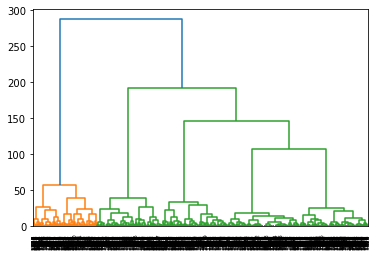

In [25]:
from scipy.cluster import hierarchy

Z=hierarchy.linkage(df,'ward')

hierarchy.dendrogram(Z,leaf_rotation=90,leaf_font_size=6,labels=df.index)

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [85.0, 85.0, 95.0, 95.0],
  [62.5, 62.5, 90.0, 90.0],
  [40.0, 40.0, 76.25, 76.25],
  [12.5, 12.5, 58.125, 58.125]],
 'dcoord': [[0.0, 38.85878882501901, 38.85878882501901, 0.0],
  [0.0, 57.73479923872947, 57.73479923872947, 38.85878882501901],
  [0.0, 38.682330777866774, 38.682330777866774, 0.0],
  [0.0, 29.70556149147639, 29.70556149147639, 0.0],
  [0.0, 33.46352838887922, 33.46352838887922, 29.70556149147639],
  [0.0, 106.66587452486026, 106.66587452486026, 0.0],
  [33.46352838887922,
   145.81481566450907,
   145.81481566450907,
   106.66587452486026],
  [38.682330777866774,
   192.46322766587434,
   192.46322766587434,
   145.81481566450907],
  [57.73479923872947,
   287.56645835679797,
   287.56645835679797,
   192.46322766587434]],
 'ivl': ['(125)',
  '(54)',
  '(106)',
  '(173)',
  '(122)',
  '(94)',
  '(69)',
  '(127)',
  '(323)'

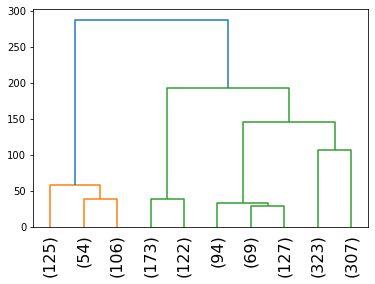

In [26]:
hierarchy.dendrogram(Z,
                    truncate_mode='lastp',
                    p=10,
                    leaf_rotation=90,leaf_font_size=16,labels=df.index)

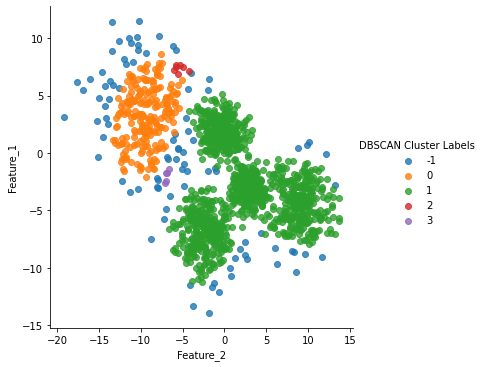

In [27]:
df=make_blobs()

from sklearn.cluster import DBSCAN
clus=DBSCAN(eps=0.9,min_samples=5,metric='euclidean')

clus.fit(df)

df['DBSCAN Cluster Labels']=clus.labels_

sns.lmplot(x='Feature_2',y='Feature_1'
          ,hue='DBSCAN Cluster Labels',data=df,fit_reg=False)

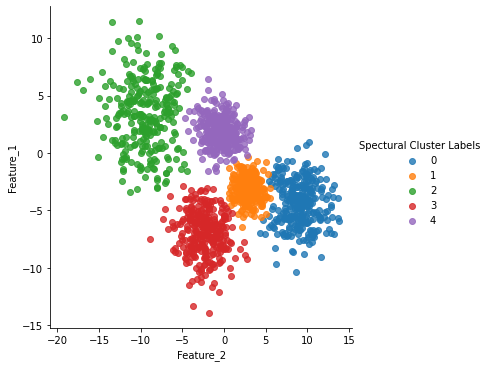

In [29]:
df=make_blobs()
from sklearn.cluster import SpectralClustering
clus=SpectralClustering(n_clusters=5,random_state=42,
                       assign_labels='kmeans',n_init=10,
                       affinity='nearest_neighbors',n_neighbors=10)

clus.fit(df)

df['Spectural Cluster Labels']=clus.labels_

sns.lmplot(x='Feature_2',y='Feature_1',
          hue='Spectural Cluster Labels',data=df,fit_reg=False)

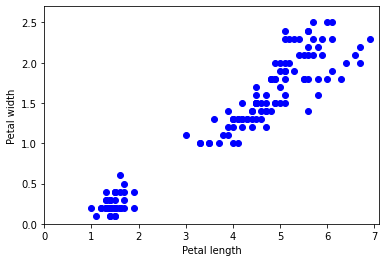

In [31]:
from sklearn import cluster,datasets

import matplotlib.pyplot as plt

iris=datasets.load_iris()
X=iris.data[:,2:]
y=iris.target
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.axis([0,X[:,0].max()+0.2,0,X[:,1].max()+0.2])
plt.plot(X[:,0],X[:,1],'bo')

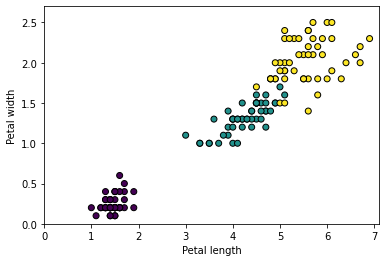

In [35]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='viridis',edgecolors='k')

plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.axis([0,X[:,0].max()+0.2,0,X[:,1].max()+0.2])

plt.show()

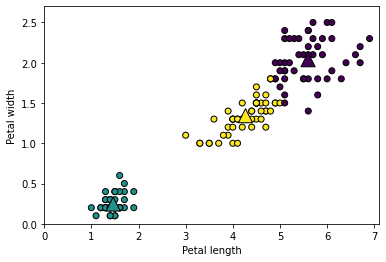

In [39]:
#Week6
#id: 1912360
#NAME: ANCHAERIN
from sklearn.cluster import KMeans
k_means=cluster.KMeans(n_clusters=3).fit(X)
y_pred=k_means.predict(X)

plt.scatter(X[:,0],X[:,1],c=y_pred,cmap='viridis',edgecolors='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1]
           ,c=[0,1,2],cmap='viridis',marker='^',s=200,edgecolors='k')
plt.axis([0,X[:,0].max()+0.2,0,X[:,1].max()+0.2])

plt.show()

In [38]:
from sklearn.cluster import KMeans
iris=datasets.load_iris()
X_iris=iris.data
y_iris=iris.target
k_means=cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)
print(k_means.labels_[::10])
print(y_iris[::10])

[1 1 1 1 1 0 0 0 0 0 2 2 2 2 2]
[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2]
